In [23]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.simplefilter("ignore")

In [3]:
data = pd.read_csv('Language Detection.csv')

In [4]:
data

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [6]:
data.isnull().sum()

Text        0
Language    0
dtype: int64

In [7]:
data["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [8]:
X = data["Text"]
y = data["Language"]

In [9]:
# label encoding

In [11]:
le = LabelEncoder()
y = le.fit_transform(y)

In [12]:
# text processing

In [13]:
# creating a list for appending the preprocessed text
data_list = []
# iterating through all the text
for text in X:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list.append(text)

In [15]:
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape 

(10337, 34937)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [19]:
# model training

In [20]:
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [21]:
y_pred = model.predict(x_test)

In [24]:
# model evaluation

In [25]:
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [26]:
print("Accuracy is :",ac)

Accuracy is : 0.9782398452611218


In [27]:
# visualizing

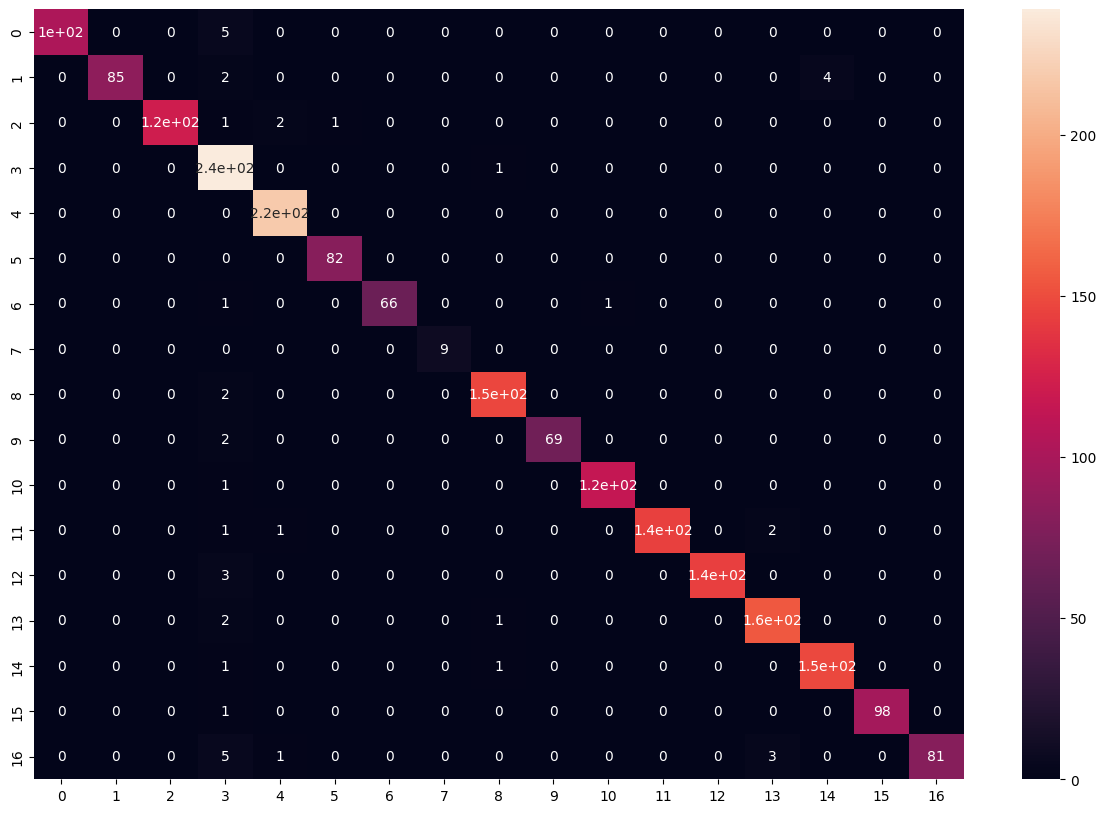

In [28]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [29]:
# predection

In [30]:
def predict(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The langauge is in",lang[0])

In [49]:
# English
predict("Napoleon Bonaparte was a French general and statesman who played a pivotal role in the history of France and Europe in the early 19th century. He was born in Corsica in 1769 and became renowned for his military talents during the French Revolution. Napoleon led successful military campaigns in Europe, expanding the French Empire.")

The langauge is in English


In [50]:
# French
predict("Napoléon Bonaparte était un général et un homme politique français qui a joué un rôle majeur dans l'histoire de la France et de l'Europe au début du XIXe siècle. Il est né en Corse en 1769 et est devenu célèbre pour ses talents militaires pendant la Révolution française. Napoléon a mené des campagnes militaires réussies en Europe, élargissant ainsi l'empire français.")

The langauge is in French


In [52]:
# Arabic
predict("توفر  بوابة معرفية قائمة على المجتمع لمحترفي التحليلات وعلوم البيانات")

The langauge is in Arabic


In [55]:
# Spanish
predict("Napoleón Bonaparte fue un general y estadista francés que desempeñó un papel crucial en la historia de Francia y Europa a principios del siglo XIX. Nació en Córcega en 1769 y se hizo famoso por sus talentos militares durante la Revolución Francesa. Napoleón lideró campañas militares exitosas en Europa, expandiendo así el Imperio Francés.")

The langauge is in Spanish


In [39]:
# Malayalam
predict("അനലിറ്റിക്സ്, ഡാറ്റാ സയൻസ് പ്രൊഫഷണലുകൾക്കായി കമ്മ്യൂണിറ്റി അധിഷ്ഠിത വിജ്ഞാന പോർട്ടൽ അനലിറ്റിക്സ് വിദ്യ നൽകുന്നു")

The langauge is in Malayalam


In [54]:
# Russian
predict("Наполеон Бонапарт был французским генералом и политиком, который сыграл ключевую роль в истории Франции и Европы в начале XIX века. Он родился в Корсике в 1769 году и стал известен своими военными способностями во времена Французской революции. Наполеон провел успешные военные кампании в Европе, расширяя французскую империю.")

The langauge is in Russian


In [56]:
# portugese
predict(' governo de Napoleão deixou uma marca duradoura na França e na Europa, tanto no campo político quanto no cultural. Ele é frequentemente considerado uma das figuras mais influentes da história moderna.')

The langauge is in Portugeese


In [62]:
# turkish
predict('Napolyon Bonapart, 19. yüzyılın başlarında Fransa ve Avrupa tarihinde önemli bir rol oynayan bir Fransız general ve devlet adamıydı. 1769 yılında Korsikada doğdu ve Fransız Devrimi sırasında askeri yetenekleri ile ünlü hale geldi. Napolyon, Avrupada başarılı askeri kampanyaları yöneterek Fransız İmparatorluğunu genişletti.')

The langauge is in Turkish


In [63]:
# greek
predict('Ο Ναπολέων Βοναπάρτης ήταν γάλλος στρατηγός και πολιτικός που διαδραμάτισε κεντρικό ρόλο στην ιστορία της Γαλλίας και της Ευρώπης στις αρχές του 19ου αιώνα. Γεννήθηκε στην Κορσική το 1769 και έγινε γνωστός για τα στρατιωτικά του ταλέντα κατά τη διάρκεια της Γαλλικής Επανάστασης. Ο Ναπολέων ηγήθηκε επιτυχημένων στρατιωτικών εκστρατειών στην Ευρώπη, επεκτείνοντας έτσι τη Γαλλική Αυτοκρατορία.')

The langauge is in Greek


In [64]:
#danish
predict('Napoleon Bonaparte var en fransk general og statsmand, der spillede en afgørende rolle i Frankrigs og Europas historie i begyndelsen af ​​det 19. århundrede. Han blev født på Korsika i 1769 og blev berømt for sine militære evner under den franske revolution. Napoleon førte succesfulde militære kampagner i Europa og udvidede dermed det franske imperium.')

The langauge is in Danish
